# Карта метода

## 1. Название метода  
Метод k-средних (K-Means)

## 2. Описание метода 
алгоритм машинного обучения без учителя, который используется для кластеризации данных. Его основная цель состоит в разделении набора данных на заранее определенное количество кластеров (обозначаемое как k), таким образом, чтобы точки внутри одного кластера были схожи между собой, а точки из разных кластеров были различны.

## 3. Механизм работы
Основные шаги алгоритма k-средних:

* Инициализация центров кластеров: Начальные центры кластеров выбираются случайным образом или на основе некоторой эвристики.
* Присвоение точек к ближайшим центрам кластеров: Каждая точка данных присваивается к ближайшему центру кластера на основе некоторой метрики расстояния, чаще всего используется евклидово расстояние.
* Пересчет центров кластеров: Для каждого кластера вычисляется новый центр, как среднее значение всех точек, принадлежащих к этому кластеру.
* Повторение шагов 2 и 3: Шаги присвоения и пересчета центров кластеров повторяются до тех пор, пока центры кластеров не стабилизируются или не достигнут критерии остановки (например, максимальное количество итераций или минимальное изменение центров).
* Оценка качества кластеризации: После завершения алгоритма оценивается качество кластеризации, например, с помощью метрик, таких как сумма квадратов внутрикластерных расстояний или внешних метрик, если имеются истинные метки классов.

Алгоритм k-средних является одним из наиболее распространенных методов кластеризации благодаря своей простоте и эффективности. 

Функция homogeneity_score используется в контексте оценки качества кластеризации, а именно для оценки однородности кластеров. Это метрика, которая оценивает, насколько каждый кластер содержит только точки данных одного класса или группы. Она применяется в случае, когда у нас есть истинные метки классов (ground truth) и мы хотим оценить, насколько кластеры, образованные моделью, соответствуют этим истинным меткам.

Формально, если C - это кластеризация данных, а Y - истинные метки классов, то однородность h вычисляется следующим образом:  

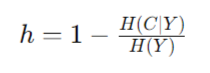  
Где H(C∣Y) - условная энтропия кластеризации при условии истинных меток классов, а H(Y) - энтропия истинных меток классов.  
Значение однородности находится в диапазоне от 0 до 1. Значение ближе к 1 указывает на более однородные кластеры, тогда как значение ближе к 0 означает менее однородные кластеры.

Эта метрика полезна для оценки того, насколько хорошо модель кластеризации улавливает внутренние структуры данных и соответствует истинным классам.








# Реализация

## Импорт библиотек

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import homogeneity_score

In [10]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

## Чтение данных

In [11]:
df = pd.read_excel('../data/dataset.xlsx')
dataset = df.copy()

## Предобработка

In [12]:
categorial_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns

In [13]:
dataset[categorial_features] = pd.get_dummies(dataset[categorial_features], drop_first=True)

X = dataset.drop(['Больной'], axis=1)
y = dataset['Больной']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=SEED,
                                                    stratify=y,
                                                    shuffle=True)

In [14]:
scaler = StandardScaler()

X_std = X.copy()
X_train_std = X_train.copy()
X_test_std = X_test.copy()

scaler.fit(X_train[numerical_features])

X_train_std[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_std[numerical_features] = scaler.transform(X_test[numerical_features])
X_std[numerical_features] = scaler.transform(X[numerical_features])

## Обучение и уменьшение размерности

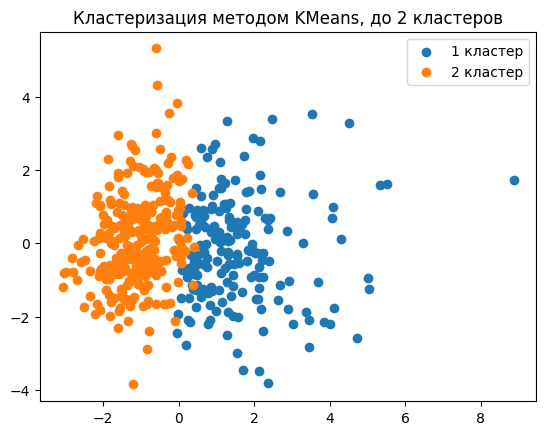

In [32]:
kmeans = KMeans(n_clusters=2, random_state=SEED, n_init="auto")
kmeans.fit(X_std)
y_predict = kmeans.predict(X_std)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)
plt.title('Кластеризация методом KMeans, до 2 кластеров')
plt.scatter(components[y_predict == 0, 0], components[y_predict == 0, 1], c='C0', label='1 кластер')
plt.scatter(components[y_predict == 1, 0], components[y_predict == 1, 1], c='C1', label='2 кластер')
plt.legend()
plt.show();

In [33]:
homogeneity_score(y, y_predict)

0.4840545118053562

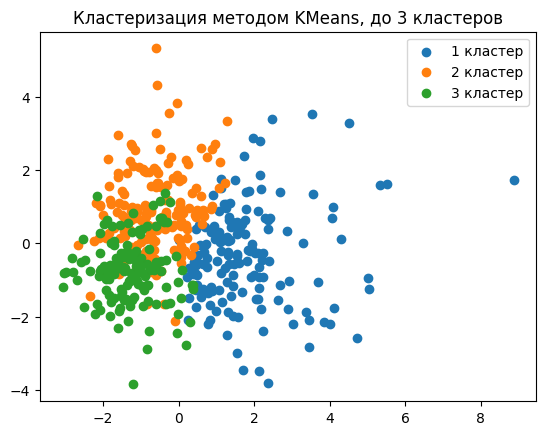

In [38]:
kmeans = KMeans(n_clusters=3, random_state=SEED, n_init="auto")
kmeans.fit(X_std)
y_predict = kmeans.predict(X_std)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)
plt.title('Кластеризация методом KMeans, до 3 кластеров')
plt.scatter(components[y_predict == 0, 0], components[y_predict == 0, 1], c='C0', label='1 кластер')
plt.scatter(components[y_predict == 1, 0], components[y_predict == 1, 1], c='C1', label='2 кластер')
plt.scatter(components[y_predict == 2, 0], components[y_predict == 2, 1], c='C2', label='3 кластер')
plt.legend()
plt.show();

In [37]:
homogeneity_score(y, y_predict)

0.4442955255061191

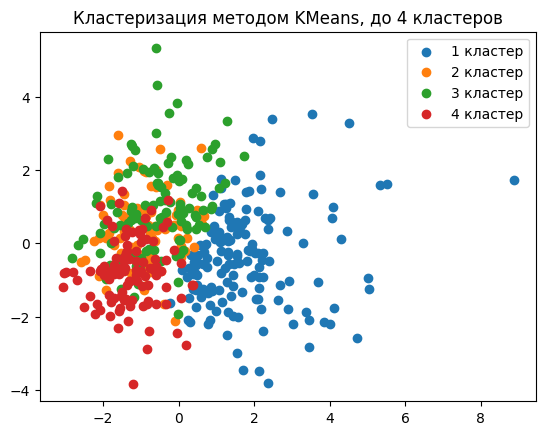

In [39]:
kmeans = KMeans(n_clusters=4, random_state=SEED, n_init="auto")
kmeans.fit(X_std)
y_predict = kmeans.predict(X_std)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)
plt.title('Кластеризация методом KMeans, до 4 кластеров')
plt.scatter(components[y_predict == 0, 0], components[y_predict == 0, 1], c='C0', label='1 кластер')
plt.scatter(components[y_predict == 1, 0], components[y_predict == 1, 1], c='C1', label='2 кластер')
plt.scatter(components[y_predict == 2, 0], components[y_predict == 2, 1], c='C2', label='3 кластер')
plt.scatter(components[y_predict == 3, 0], components[y_predict == 3, 1], c='C3', label='4 кластер')
plt.legend()
plt.show();

In [40]:
homogeneity_score(y, y_predict)

0.49827454773002394

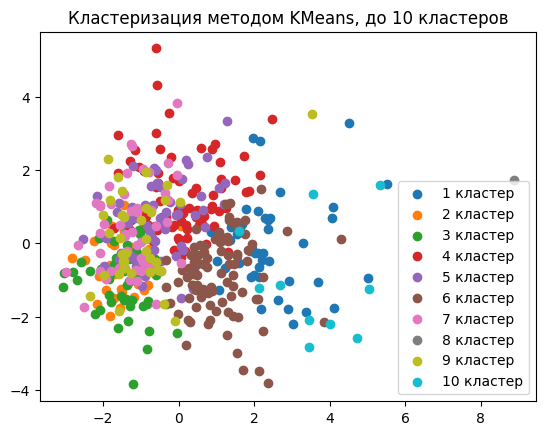

Метрика гомогенности: 0.601177279226306


In [51]:
clusters = 10

kmeans = KMeans(n_clusters=clusters, random_state=SEED, n_init="auto")
kmeans.fit(X_std)
y_predict = kmeans.predict(X_std)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

plt.title(f'Кластеризация методом KMeans, до {clusters} кластеров')

for cluster in range(clusters):
    plt.scatter(components[y_predict == cluster, 0], components[y_predict == cluster, 1], label=f'{cluster + 1} кластер')

plt.legend()
plt.show();
print('Метрика гомогенности: {}'.format(homogeneity_score(y, y_predict)))

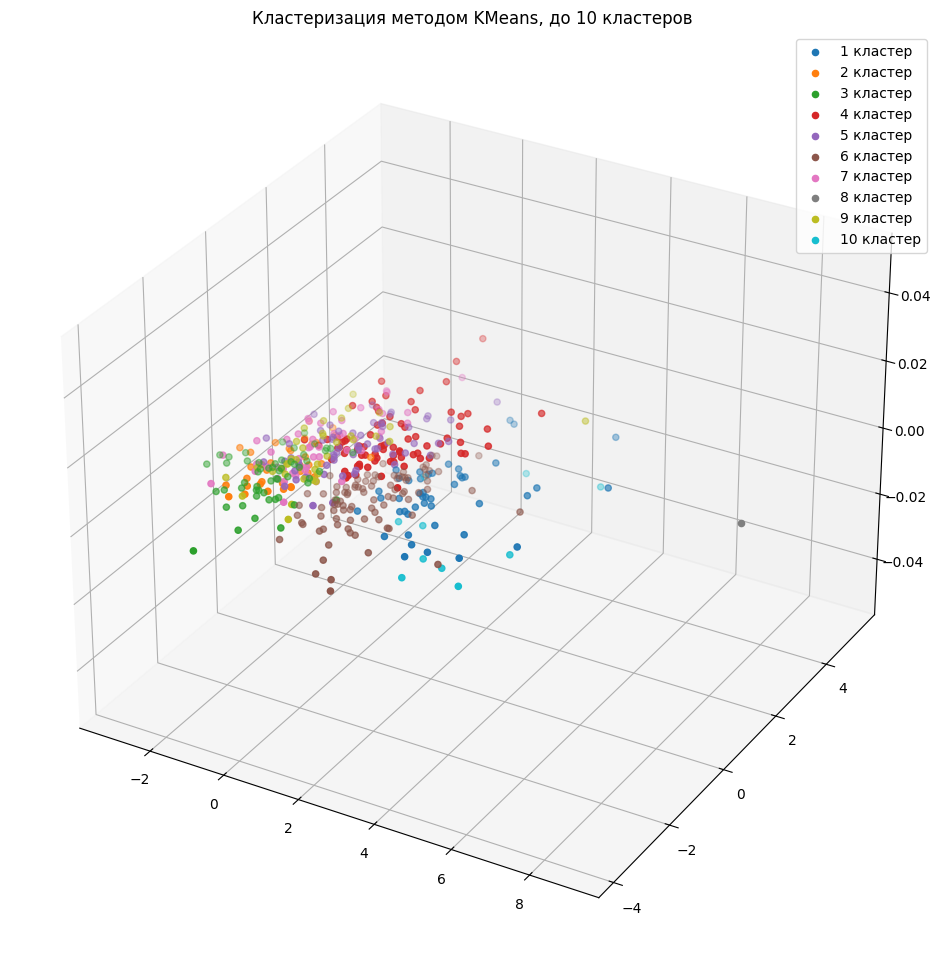

Метрика гомогенности: 0.601177279226306


In [52]:
clusters = 10

kmeans = KMeans(n_clusters=clusters, random_state=SEED, n_init="auto")
kmeans.fit(X_std)
y_predict = kmeans.predict(X_std)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(projection='3d')
plt.title(f'Кластеризация методом KMeans, до {clusters} кластеров')

for cluster in range(clusters):
    ax.scatter(components[y_predict == cluster, 0], components[y_predict == cluster, 1], label=f'{cluster + 1} кластер')

plt.legend()
plt.show();
print('Метрика гомогенности: {}'.format(homogeneity_score(y, y_predict)))